[[564. 512.]
 [583. 508.]
 [594. 514.]
 [628. 499.]
 [641. 513.]
 [618. 503.]
 [663. 510.]]
lArrayNeg:  [1.05767851 1.06332362 1.06821597 1.07169973 1.07492722 1.0775827
 1.07932281 1.08087837 1.08109222 1.07878498 1.07922653 1.08136068
 1.08193467 1.08288114 1.08361626 1.08417873 1.08472249 1.0852752
 1.08570464 1.0853247  1.08515691 1.08513409 1.08485135 1.08517745
 1.0856985  1.08540513 1.08481242 1.08319234 1.08092938 1.07652766
 1.07128213 1.065289   1.05729372 1.04989672 1.04478288]
rArrayNeg:  [0.0490493  0.05589021 0.06275469 0.06794538 0.07479456 0.0799892
 0.08678498 0.09357681 0.09861497 0.10505839 0.11010722 0.11698748
 0.12371114 0.12883283 0.13558829 0.14067129 0.1474026  0.15413621
 0.15920518 0.16579775 0.17241302 0.17741249 0.18399321 0.18903151
 0.19574188 0.20229933 0.20715467 0.21342845 0.21793496 0.22357534
 0.22897347 0.23254069 0.23718293 0.24185737 0.24541561]
xiPrimeNegarray [-18.53763324 -18.42437573 -18.04001627 -17.5186697  -16.69755385
 -16.01339832 -14.915

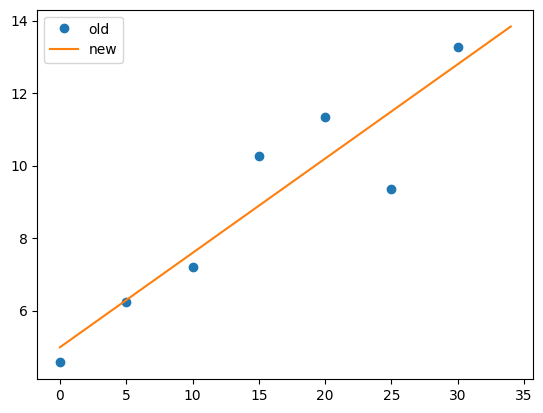

<Figure size 640x480 with 0 Axes>

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]

    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayPos[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]
    
    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayNeg[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayNeg[i] = l









# for i in range(35):
#     surplus = (i - 5*(i // 5))/5

#     lArrayNegNew[i] = lArrayNeg[i//5]*(1 - surplus) + lArrayNeg[i//5 + 1]*(surplus)
#     lArrayPosNew[i] = lArrayPos[i//5]*(1 - surplus) + lArrayPos[i//5 + 1]*(surplus)
print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [3]:
def trueXi(l, r, xiPrime, epsilon):
    

    d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    sol = fsolve(func, xiPrime)

    print("d: ", d)
    print("l: ", l)
    print("r: ", r)
    print("epsilon: ", epsilon)
    print("xiPrime: "   , xiPrime)
    print("func(sol) = " , func(sol))
    print("xi: ", sol)
    if(xiPrime == sol):
        return np.nan
    return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], xiPrimeNegArray[i], epsilonArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], xiPrimePosArray[i], epsilonArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)


xiPrimeNegArray:  [-18.53763324 -18.42437573 -18.04001627 -17.5186697  -16.69755385
 -16.01339832 -14.9151932  -13.84074545 -12.73548703 -10.95708211
 -10.03095655  -9.30486447  -8.30657072  -7.58502135  -6.68923717
  -5.95295119  -5.08594435  -4.25006422  -3.56452932  -2.63427832
  -1.76623374  -1.07690633  -0.23958126   0.36384773   1.05325585
   1.83441019   2.51497389   3.42668881   4.27960829   5.48039939
   6.74699473   7.96116287   9.47695389  10.88247445  11.90041681]
xiPrimePosArray:  [33.8316122  34.94874821 35.7947927  36.32808484 36.7373873  37.10788073
 37.24010399 37.39543295 37.34486203 36.79692586 36.9254878  37.42986447
 37.66203947 37.9951776  38.33035045 38.64873622 39.01218099 39.40675367
 39.77589347 40.0760972  40.43850824 40.80502439 41.19812134 41.64934197
 42.19036074 42.63963561 43.01372722 43.33244533 43.53579977 43.56540446
 43.52920849 43.36967102 43.08428533 42.90917301 42.94586843]
d:  0.14879257093041326
l:  1.0576785106156081
r:  0.049049300348599195
ep

In [4]:
minImages = 5
maxImages = 20

posCoef = np.polyfit(np.arange(minImages,maxImages),xiPosarray[minImages:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[minImages:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[minImages:maxImages]))



negCoef = np.polyfit(np.arange(minImages,maxImages),xiNegarray[minImages:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[minImages:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[minImages:maxImages]))

pos m:  0.05293997941476989
pos b:  41.575030754090605
pos mean:  42.21031050706787
pos sigma: 0.5164630088452832
neg m:  0.8376558934247086
neg b:  -28.38853913474361
neg mean:  -18.336668413647114
neg sigma: 3.650203524122056


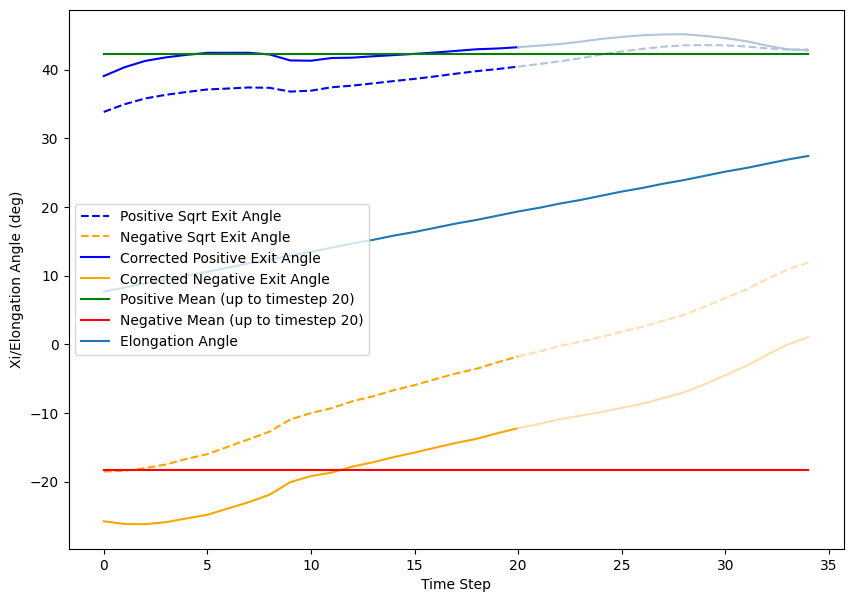

In [8]:
fig, axs = plt.subplots(figsize=(10,7))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

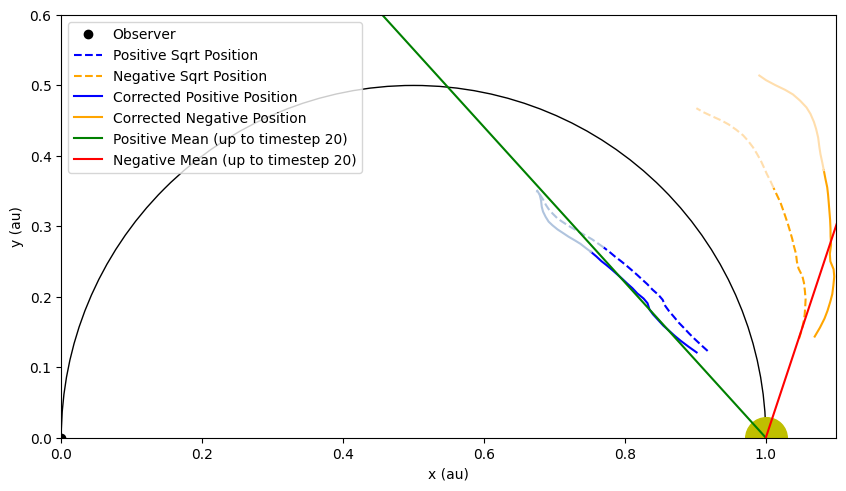

In [7]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(10,10))
axs.plot(0,0, 'ko', label = 'Observer')
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')


axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.6)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

plt.show()
